# Spaceship Titanic

Find below experiementation related to the popular spaceship titanic kaggle competition.

### Imports

In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import xgboost as xgb



### Load Data

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Basic EDA

In [4]:
# Display information about the test dataframe, including:
# - Number of rows and columns
# - Column names and their data types
# - Non-null counts
# - Memory usage
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [854]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
# Generate summary statistics for all numeric columns in the training dataset
# Shows key statistical measures including:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [856]:
cols = df_train.columns

cols = list(cols)

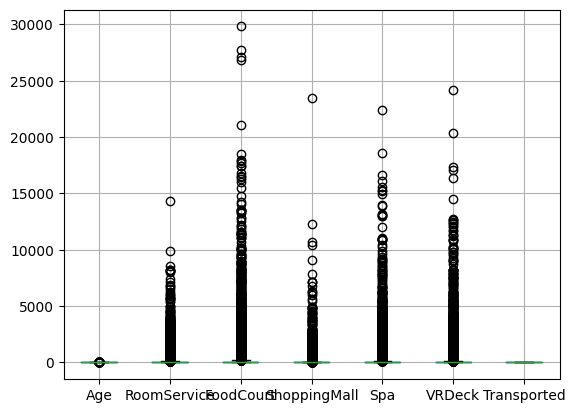

In [857]:
df_train.boxplot()
plt.show()

In [858]:
cat_features = []
num_features = []
for col in cols:
    dtype = df_train[f'{col}'].dtype

    if dtype == "object":
        cat_features.append(col)
    elif dtype == "float64":
        num_features.append(col)

In [859]:
# for col in num_features:
#     sns.boxplot(x='Transported', y=f'{col}', data=df_train)
#     plt.yscale('log')
#     plt.show()

In [860]:
# for col in cat_features:
#     pd.crosstab(df_train[f'{col}'], df_train[f'Transported']).plot(kind='bar', stacked=False)
#     plt.show()

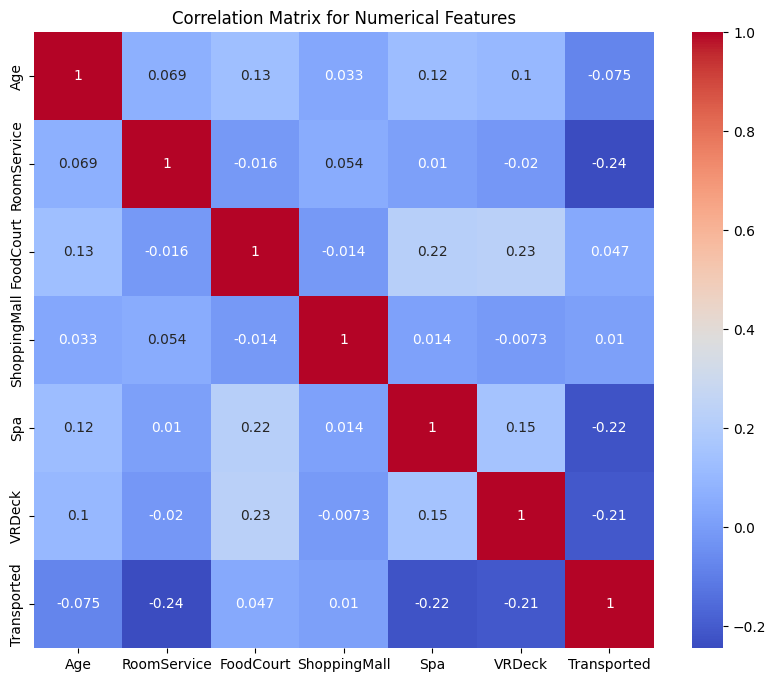

In [861]:
# Select only numerical columns
numerical_df = df_train.select_dtypes(include=['float64', 'int64', 'bool'])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

In [862]:
missing_values = df_test.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
dtype: int64


In [863]:
missing_values = df_test.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
dtype: int64


In [864]:
# Handle missing values by basic imputation
df_train['CryoSleep'].fillna(df_train['CryoSleep'].mode()[0], inplace=True)
df_train['HomePlanet'].fillna(df_train['HomePlanet'].mode()[0], inplace=True)
df_train['Destination'].fillna(df_train['Destination'].mode()[0], inplace=True)
df_train['VIP'].fillna(df_train['VIP'].mode()[0], inplace=True)
df_train['Cabin'].fillna(df_train['Cabin'].mode()[0], inplace=True)



# Handle missing values by basic imputation
df_test['CryoSleep'].fillna(df_test['CryoSleep'].mode()[0], inplace=True)
df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode()[0], inplace=True)
df_test['Destination'].fillna(df_test['Destination'].mode()[0], inplace=True)
df_test['VIP'].fillna(df_test['VIP'].mode()[0], inplace=True)
df_test['Cabin'].fillna(df_test['Cabin'].mode()[0], inplace=True)

C:\Users\mattias.hoehnen\AppData\Local\Temp\ipykernel_30988\4082287502.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['CryoSleep'].fillna(df_train['CryoSleep'].mode()[0], inplace=True)
C:\Users\mattias.hoehnen\AppData\Local\Temp\ipykernel_30988\4082287502.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',

In [865]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['RoomService'].fillna(df_train['RoomService'].median(), inplace=True)
df_train['FoodCourt'].fillna(df_train['FoodCourt'].median(), inplace=True)
df_train['ShoppingMall'].fillna(df_train['ShoppingMall'].median(), inplace=True)
df_train['Spa'].fillna(df_train['Spa'].median(), inplace=True)
df_train['VRDeck'].fillna(df_train['VRDeck'].median(), inplace=True)

df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['RoomService'].fillna(df_test['RoomService'].median(), inplace=True)
df_test['FoodCourt'].fillna(df_test['FoodCourt'].median(), inplace=True)
df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].median(), inplace=True)
df_test['Spa'].fillna(df_test['Spa'].median(), inplace=True)
df_test['VRDeck'].fillna(df_test['VRDeck'].median(), inplace=True)

C:\Users\mattias.hoehnen\AppData\Local\Temp\ipykernel_30988\1393698186.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
C:\Users\mattias.hoehnen\AppData\Local\Temp\ipykernel_30988\1393698186.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [866]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [867]:
#Feature Eng
df_train['Total Spend'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['ShoppingMall'] + df_train['Spa'] + df_train['VRDeck']
df_train['Total Spend Age'] = df_train['Total Spend'] / df_train['Age']

#Feature Eng
df_test['Total Spend'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck']
df_test['Total Spend Age'] = df_test['Total Spend'] / df_test['Age']

In [868]:
#Cat Feature Eng
# Extract surname
df_train['Surname'] = df_train['Name'].apply(lambda x: x.split(",")[0])

# Count family size
df_train['Family_Size'] = df_train.groupby('Surname')['Surname'].transform('count')

# Extract title
df_train['Title'] = df_train['Name'].apply(lambda x: x.split(",")[1].split(".")[0].strip())

# Create Is_Alone feature
df_train['Is_Alone'] = (df_train['Family_Size'] == 1).astype(int)

# Check the engineered features
print(df_train[['Name', '  Surname', 'Family_Size', 'Title', 'Is_Alone']].head())

AttributeError: 'float' object has no attribute 'split'

In [820]:

cab = df_train['Cabin']
deck = []
side = []
num = []

for i in cab:
    split_text = i.split("/")
    deck.append(split_text[0])
    num.append(split_text[1])
    side.append(split_text[2])
df_train['Deck'] = deck
df_train['Side'] = side
# df_train['num'] = num

In [821]:

cab = df_test['Cabin']
deck = []
side = []
num = []

for i in cab:
    split_text = i.split("/")
    deck.append(split_text[0])
    num.append(split_text[1])
    side.append(split_text[2])
df_test['Deck'] = deck
df_test['Side'] = side
# df_test['num'] = num

In [822]:
# drop irrelevant cols

y = df_train['Transported']
train_pass_id = df_train['PassengerId']
df_train.drop(columns=['PassengerId', 'Name', 'Transported', 'Cabin'], inplace=True)

test_passenger_Id = df_test['PassengerId']
df_test.drop(columns=['PassengerId', 'Name', 'Cabin'], inplace=True)

In [823]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total Spend,Total Spend Age,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,30.666667,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,179.017241,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,156.848485,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,68.187500,F,S


In [824]:
scaler = MinMaxScaler()

numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

df_test[numerical_features] = scaler.transform(df_test[numerical_features])

In [825]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total Spend,Total Spend Age,Deck,Side
0,Europa,False,TRAPPIST-1e,0.493671,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,B,P
1,Earth,False,TRAPPIST-1e,0.303797,False,0.007608,0.000302,0.001064,0.024500,0.001823,0.020452,0.018111,F,S
2,Europa,False,TRAPPIST-1e,0.734177,True,0.003001,0.119948,0.000000,0.299670,0.002030,0.288521,0.105726,A,S
3,Europa,False,TRAPPIST-1e,0.417722,False,0.000000,0.043035,0.015793,0.148563,0.007997,0.143830,0.092633,A,S
4,Earth,False,TRAPPIST-1e,0.202532,False,0.021149,0.002348,0.006428,0.025214,0.000083,0.030317,0.040271,F,S


In [826]:
cols_to_encode = ['HomePlanet', 'Destination', 'Deck', 'Side']
#Encode Cats
df_train['VIP'] = df_train['VIP'].map({False: 0, True: 1})
df_train['CryoSleep'] = df_train['CryoSleep'].map({True: 0, False: 1})
df_train = pd.get_dummies(df_train, columns=cols_to_encode)
df_train.head()

#Encode Cats
df_test['VIP'] = df_test['VIP'].map({False: 0, True: 1})
df_test['CryoSleep'] = df_test['CryoSleep'].map({True: 0, False: 1})
df_test = pd.get_dummies(df_test, columns=cols_to_encode)


In [827]:

X = df_train


In [828]:
#what to do with num column?

In [839]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [840]:
optimizer = Adam(learning_rate=0.0005)

In [841]:
# model = Sequential()

# # Input and first Hidden Layer
# model.add(Dense(512, input_dim=X_train.shape[1], activation='relu',kernel_regularizer=l2(0.001)))
# model.add(Dropout(0.3))

# # 2nd  Hidden Layer
# model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Dropout(0.3))

# # 3rd Hidden Layer
# model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Dropout(0.2))

# # 4th Hidden Layer
# model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))



# # 5th Hidden Layer
# model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))



# # Output 
# model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [842]:
# # train
# history = model.fit(
#     X_train, y_train,
#     validation_split=0.2,
#     epochs=60,
#     batch_size=32,
#     verbose= True 
# )

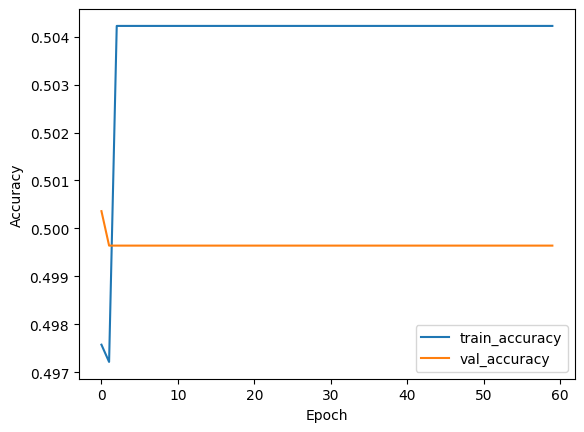

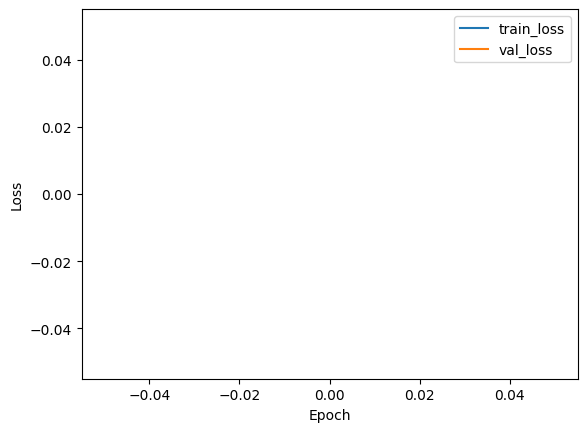

In [843]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [844]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

AttributeError: 'XGBClassifier' object has no attribute 'evaluate'

In [845]:
X_train.dtypes

CryoSleep                      int64
Age                          float64
VIP                            int64
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
Total Spend                  float64
Total Spend Age              float64
HomePlanet_Earth                bool
HomePlanet_Europa               bool
HomePlanet_Mars                 bool
Destination_55 Cancri e         bool
Destination_PSO J318.5-22       bool
Destination_TRAPPIST-1e         bool
Deck_A                          bool
Deck_B                          bool
Deck_C                          bool
Deck_D                          bool
Deck_E                          bool
Deck_F                          bool
Deck_G                          bool
Deck_T                          bool
Side_P                          bool
Side_S                          bool
dtype: object

In [846]:
params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100,
    'verbosity': 1
}

model = xgb.XGBClassifier(**params)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

[0]	validation_0-logloss:0.65728
[1]	validation_0-logloss:0.62548
[2]	validation_0-logloss:0.59700
[3]	validation_0-logloss:0.57324
[4]	validation_0-logloss:0.55227
[5]	validation_0-logloss:0.53548
[6]	validation_0-logloss:0.52181
[7]	validation_0-logloss:0.50924
[8]	validation_0-logloss:0.49787
[9]	validation_0-logloss:0.48967
[10]	validation_0-logloss:0.48056
[11]	validation_0-logloss:0.47288
[12]	validation_0-logloss:0.46623
[13]	validation_0-logloss:0.46060
[14]	validation_0-logloss:0.45633
[15]	validation_0-logloss:0.45188
[16]	validation_0-logloss:0.44776
[17]	validation_0-logloss:0.44452
[18]	validation_0-logloss:0.44149
[19]	validation_0-logloss:0.43881
[20]	validation_0-logloss:0.43620
[21]	validation_0-logloss:0.43418
[22]	validation_0-logloss:0.43222
[23]	validation_0-logloss:0.43034
[24]	validation_0-logloss:0.42836
[25]	validation_0-logloss:0.42681
[26]	validation_0-logloss:0.42588
[27]	validation_0-logloss:0.42497
[28]	validation_0-logloss:0.42311
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [847]:
# Grid
model_grid = xgb.XGBClassifier(**params) # Instantiate new model
# Hyper Param Tuning 
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [ 4, 6, 8],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.4, 0.8],
    'n_estimators': [25, 50, 100]
}



grid_search = GridSearchCV(estimator=model_grid, param_grid=param_grid, scoring='accuracy', cv=3, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, ma...
                                     max_delta_step=None, max_depth=6,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 6, 8],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [25, 50, 100],
                         'subsample': [0.4, 0.8]},
             scoring='accuracy', verbose=True)

In [848]:
print(f"Best Parameters {grid_search.best_params_}")
print(f"Best Performance: {grid_search.best_score_}")

Best Parameters {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.8}
Best Performance: 0.8074489502444636


In [849]:
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy is: {accuracy}%")

print(classification_report(y_test, y_pred))

Accuracy is: 0.7941345600920069%
              precision    recall  f1-score   support

       False       0.81      0.77      0.79       861
        True       0.78      0.82      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [ ]:
y_pred = model.predict(X_test)

test_score = accuracy_score(y_test, y_pred)
print(test_score)

In [ ]:
df_test.head()

In [ ]:
predictions = model.predict(df_test)
submission_pres = predictions > 0.5
submission_pres

In [ ]:
len(predictions)

In [ ]:
len(test_passenger_Id)

In [801]:
# Assuming test_df has 'PassengerId' column
submission = pd.DataFrame({
    'PassengerId': test_passenger_Id,
    'Transported': submission_pres
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

In [ ]:
submission.head()